In [1]:
import os , sys , matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px


In [2]:
df= pd.read_csv('data.csv')
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
def preprocess(df):
    print("========== BASIC OVERVIEW ==========")
    print(f"Shape of DataFrame: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nLast 5 rows:")
    print(df.tail())

    print("\n========== DATA TYPES AND MEMORY USAGE ==========")
    df.info()
    
    print("\n========== NULL VALUES ==========")
    null_vals = df.isnull().sum()
    print(null_vals[null_vals > 0] if null_vals.sum() > 0 else "No missing values found.")

    print("\n========== UNIQUE VALUES PER COLUMN ==========")
    print(df.nunique())

    print("\n========== STATISTICAL SUMMARY ==========")
    print("Numerical Columns:")
    print(df.describe())
    
    print("\nCategorical Columns:")
    cat_cols = df.select_dtypes(include='object').columns
    if not cat_cols.empty:
        print(df[cat_cols].describe())
    else:
        print("No categorical columns.")

    print("\n========== COLUMN TYPES ==========")
    print(df.dtypes)

    print("\n========== CORRELATION MATRIX ==========")
    corr = df.corr(numeric_only=True)
    if not corr.empty:
        print(corr)
    else:
        print("No numerical columns to compute correlation.")

        print(f"The columns in the data are: {df.columns}")

    

In [4]:
prep=preprocess(df)

========== BASIC OVERVIEW ==========
Shape of DataFrame: (1470, 35)

First 5 rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1            

In [5]:
# visualizer.py

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

def visualize_preprocessing(
    df: pd.DataFrame,
    target: str = None,
    show_missing: bool = True,
    show_categorical: bool = True,
    show_numerical: bool = True,
    show_boxplots: bool = True,
    show_correlation: bool = True,
    show_pairplot: bool = False,
    show_plotly: bool = True,
    max_categories: int = 20
):
    """
    Visualizes various aspects of a dataset for exploratory data analysis.

    Parameters:
    - df (pd.DataFrame): The dataframe to visualize.
    - target (str, optional): The name of the target column (for supervised tasks).
    - show_missing (bool): Show missing values heatmap.
    - show_categorical (bool): Show count plots for categorical columns.
    - show_numerical (bool): Show histograms for numerical columns.
    - show_boxplots (bool): Show boxplots for outlier detection.
    - show_correlation (bool): Show correlation heatmap for numerical columns.
    - show_pairplot (bool): Show seaborn pairplot (slow for large datasets).
    - show_plotly (bool): Show interactive plotly histogram for the first numerical column.
    - max_categories (int): Maximum unique categories for plotting categorical features.

    Returns:
    None
    """

    sns.set(style='whitegrid', palette='muted')
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include='object').columns

    # 1. Missing Values Heatmap
    if show_missing:
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title("Missing Values Heatmap")
        plt.show()

    # 2. Categorical Features
    if show_categorical and len(cat_cols) > 0:
        for col in cat_cols:
            if df[col].nunique() <= max_categories:
                plt.figure(figsize=(10, 4))
                sns.countplot(data=df, x=col, order=df[col].value_counts().index)
                plt.title(f"Count Plot of '{col}'")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

    # 3. Numerical Histograms
    if show_numerical and len(num_cols) > 0:
        df[num_cols].hist(figsize=(16, 10), bins=30, edgecolor='black', color='skyblue')
        plt.suptitle("Histograms of Numerical Features")
        plt.tight_layout()
        plt.show()

    # 4. Boxplots
    if show_boxplots and len(num_cols) > 0:
        for col in num_cols:
            plt.figure(figsize=(8, 3))
            sns.boxplot(x=df[col])
            plt.title(f"Boxplot of '{col}'")
            plt.tight_layout()
            plt.show()

    # 5. Correlation Heatmap
    if show_correlation and len(num_cols) > 1:
        corr = df[num_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()

    # 6. Pairplot
    if show_pairplot and len(num_cols) <= 5:
        sns.pairplot(df[num_cols])
        plt.suptitle("Pairplot of Numerical Features", y=1.02)
        plt.show()

    # 7. Plotly Interactive Histogram
    if show_plotly and len(num_cols) > 0:
        fig = px.histogram(df, x=num_cols[0], title=f"Interactive Histogram of '{num_cols[0]}'")
        fig.update_layout(bargap=0.2)
        fig.show()

    # 8. Target Column Distribution
    if target and target in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=target)
        plt.title(f"Distribution of Target Variable: '{target}'")
        plt.tight_layout()
        plt.show()


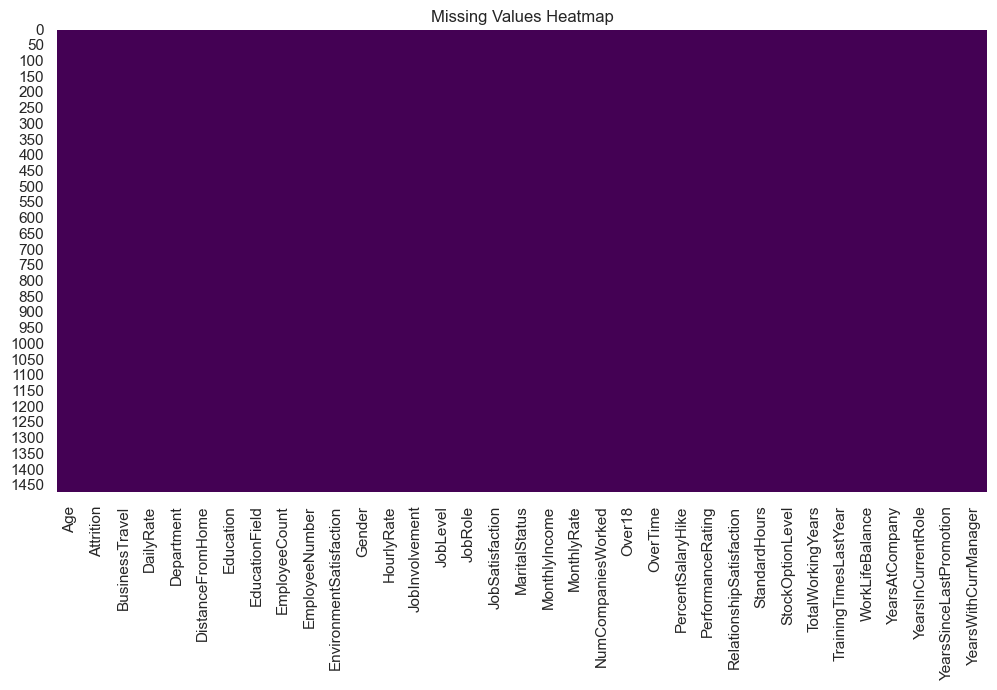

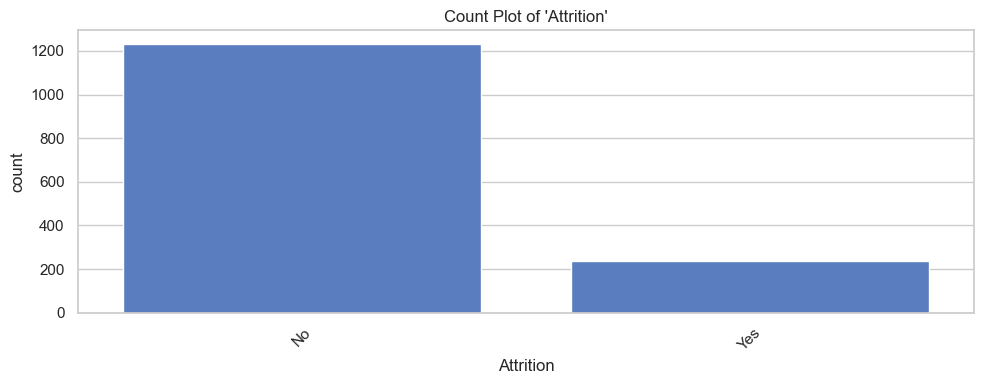

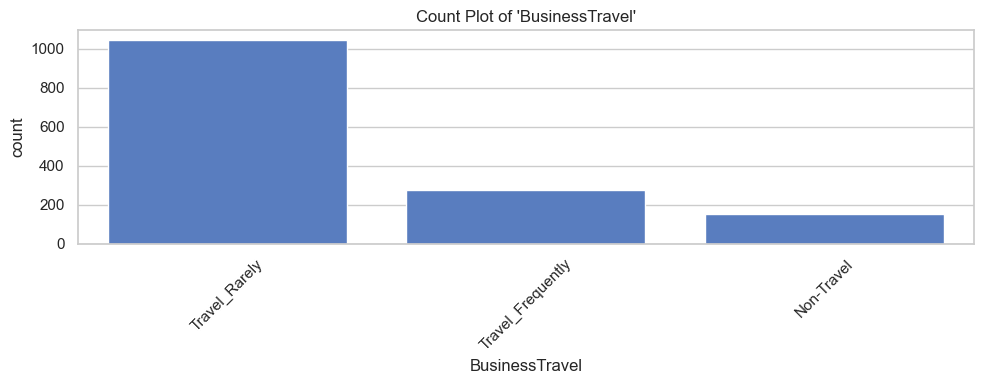

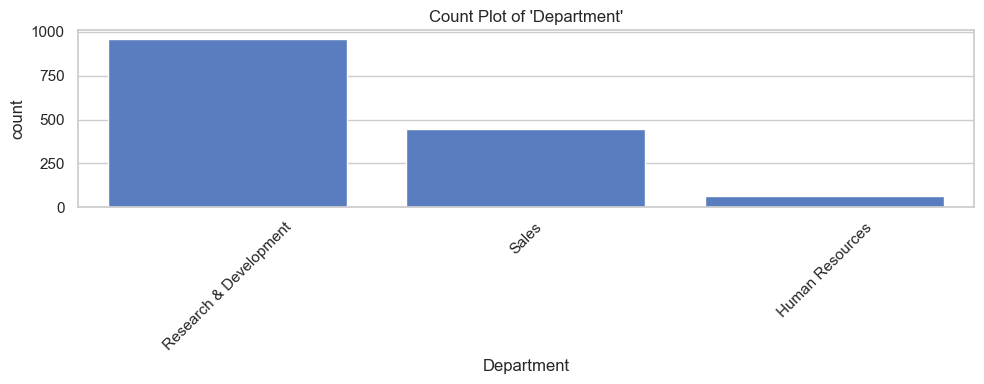

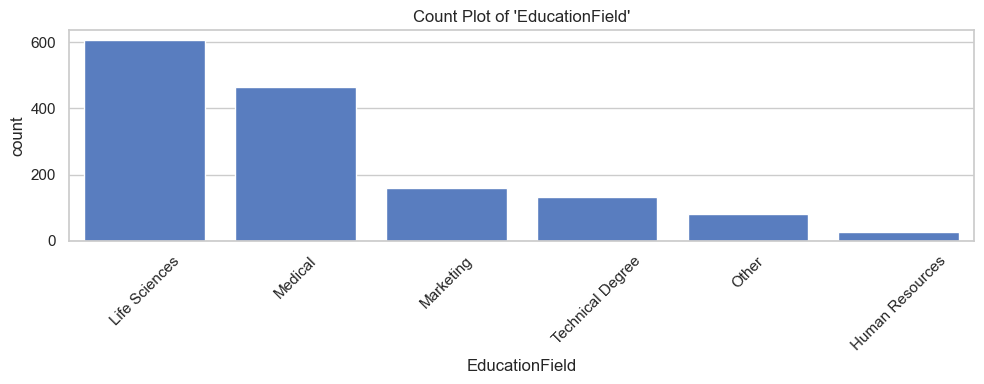

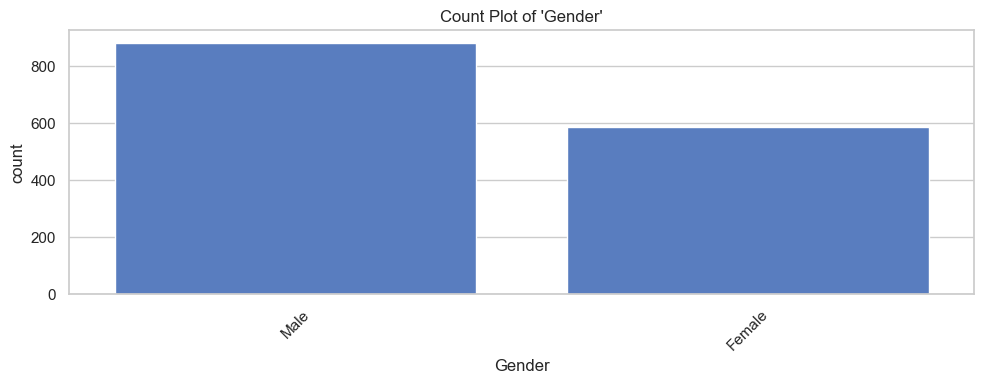

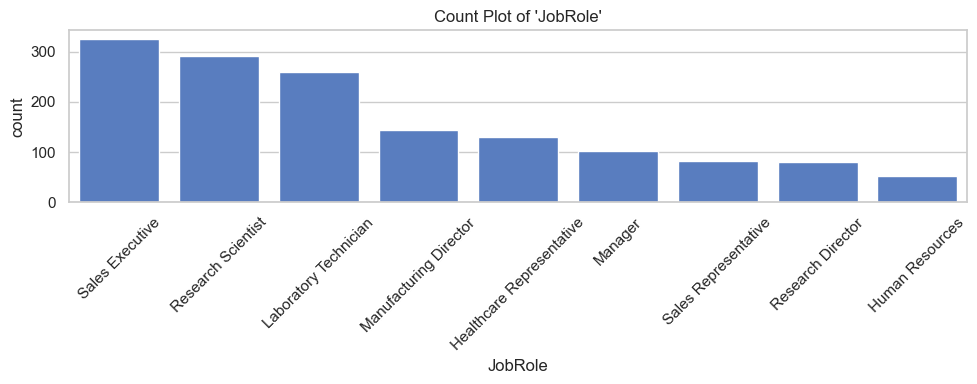

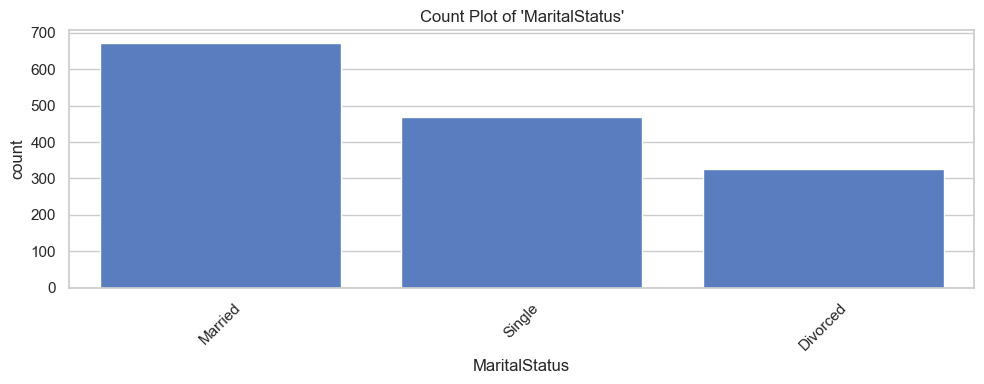

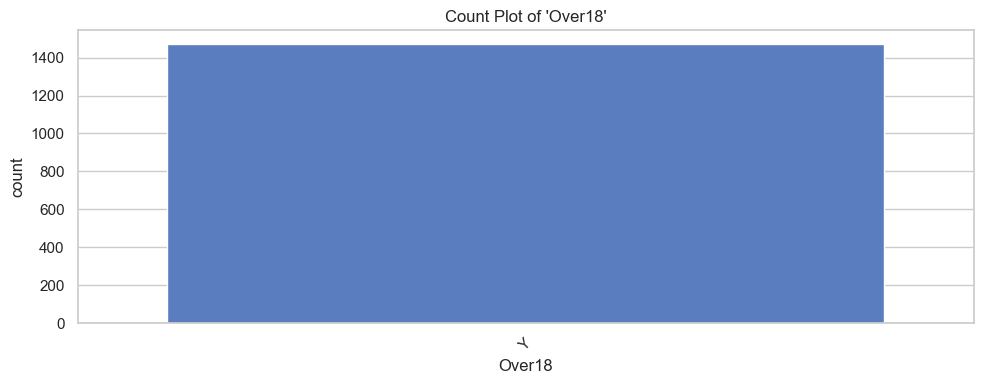

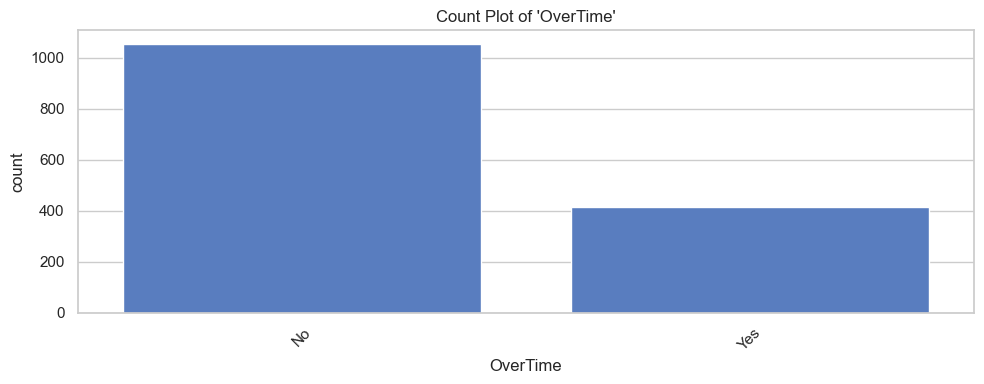

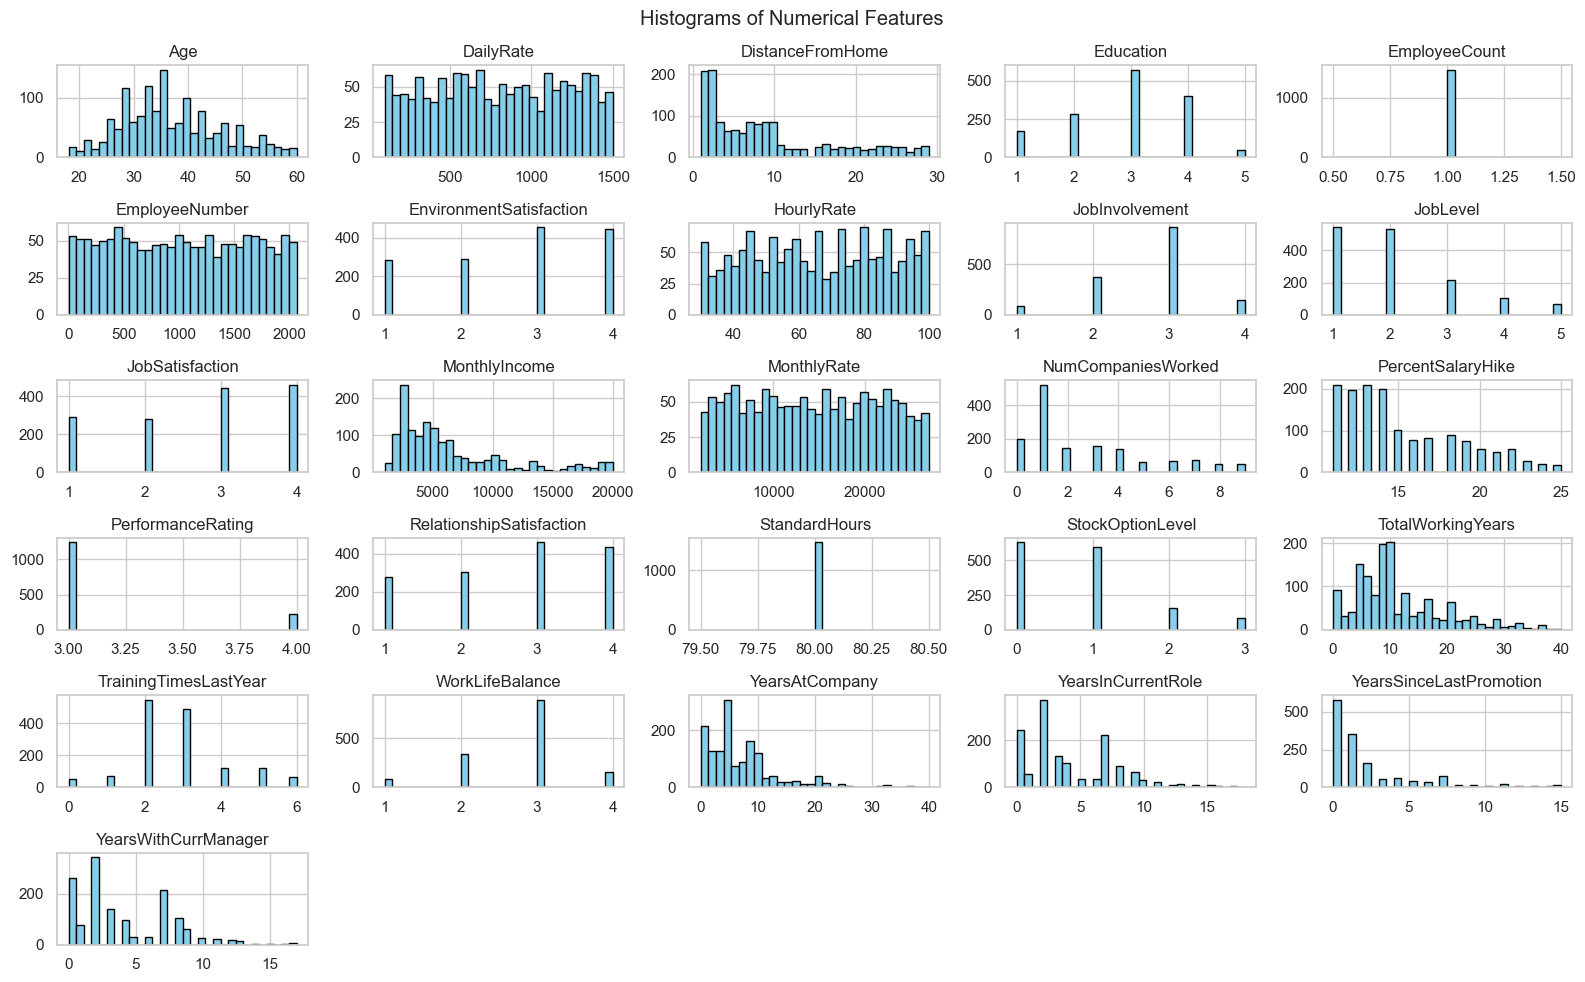

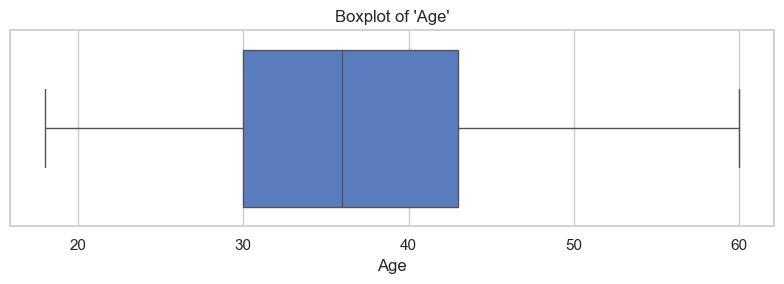

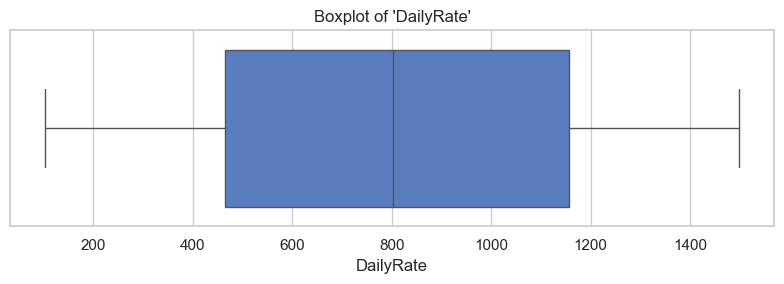

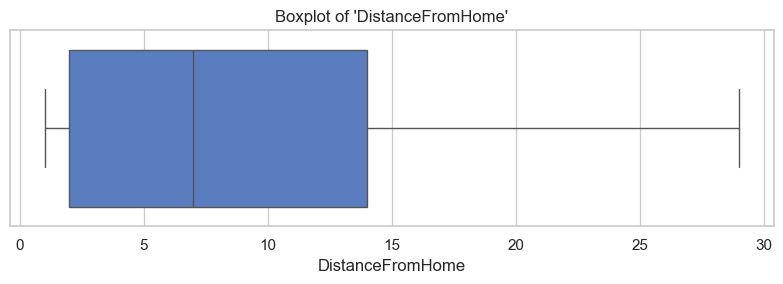

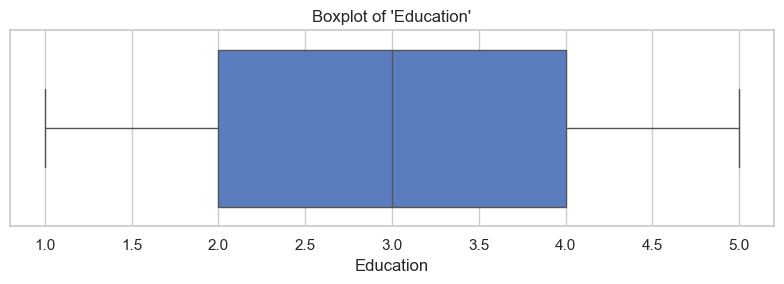

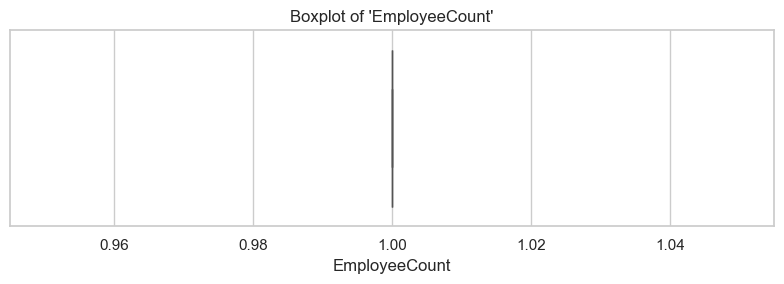

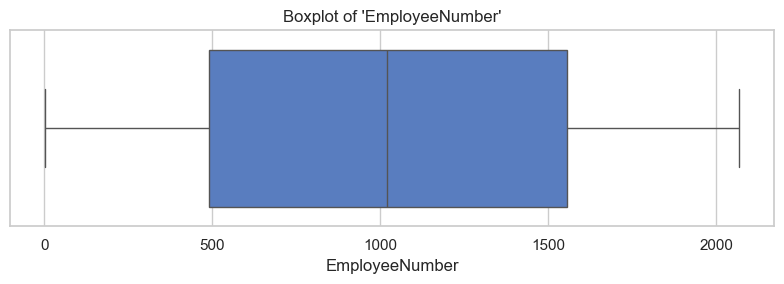

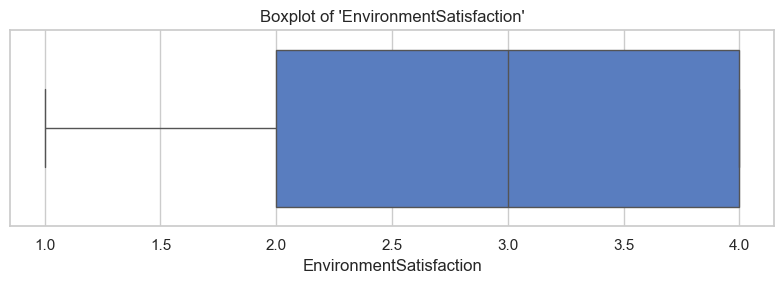

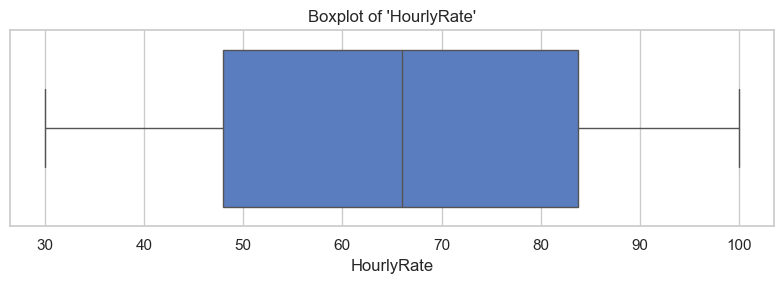

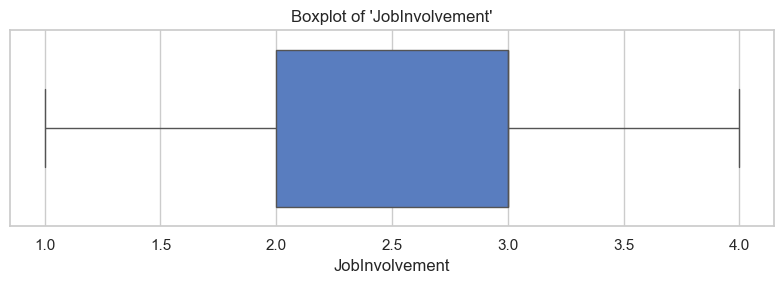

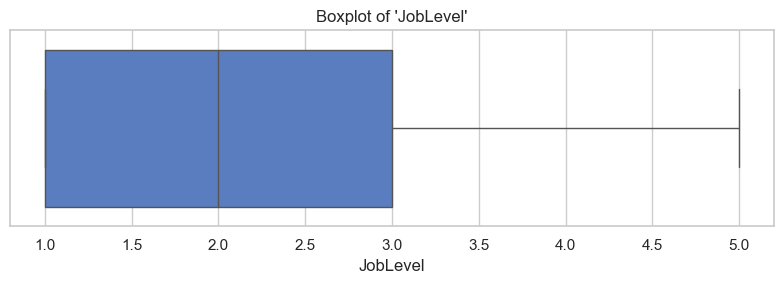

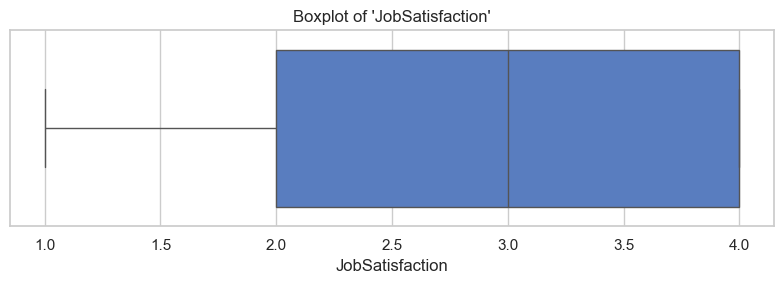

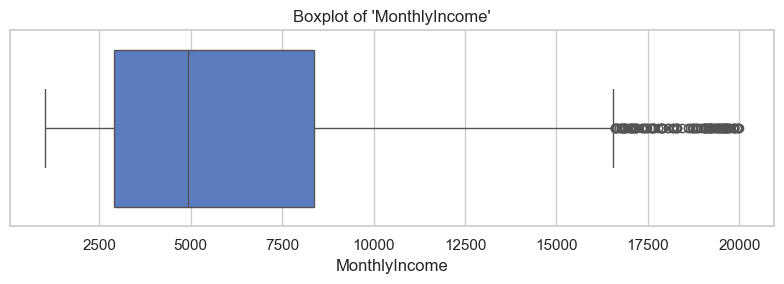

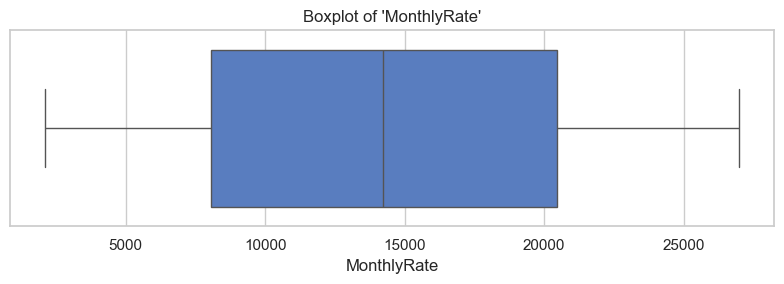

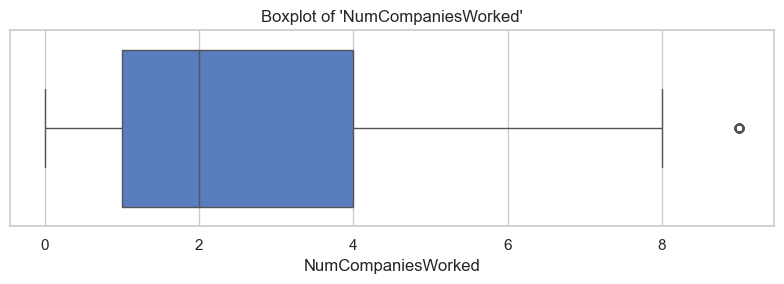

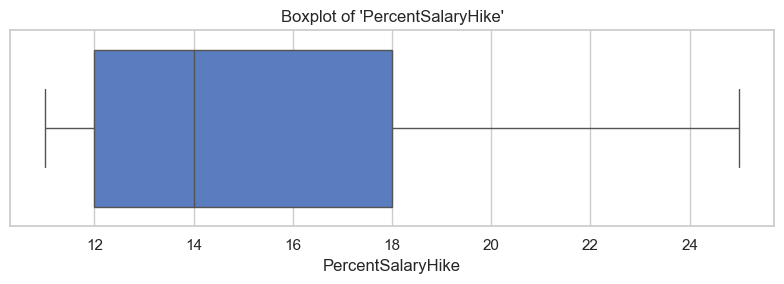

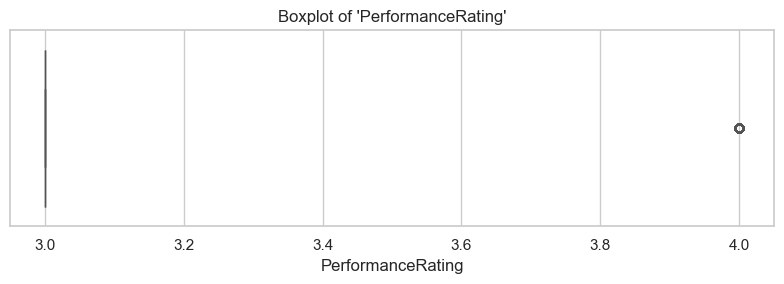

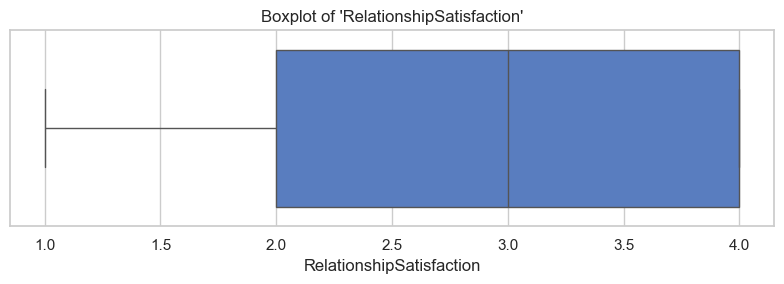

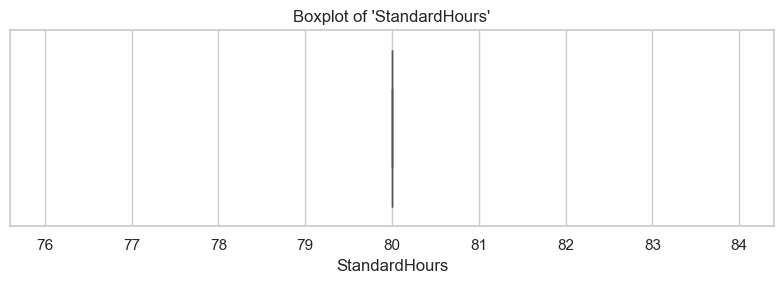

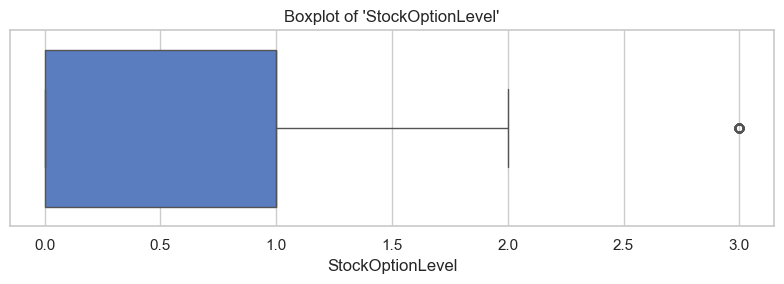

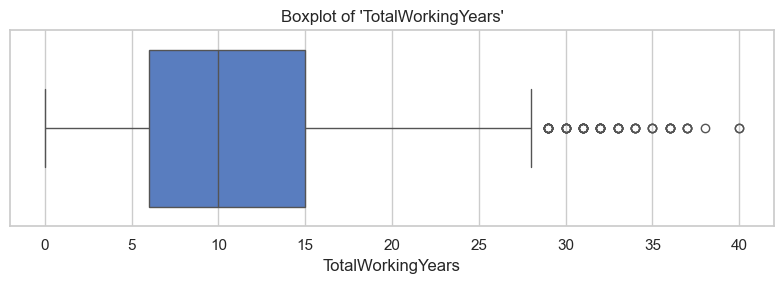

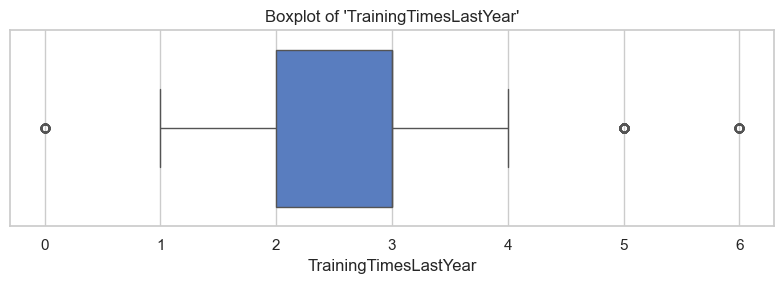

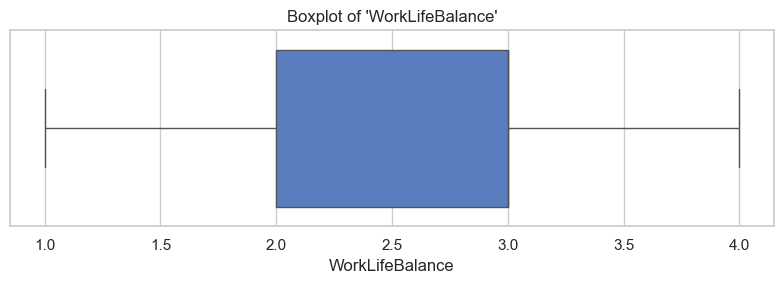

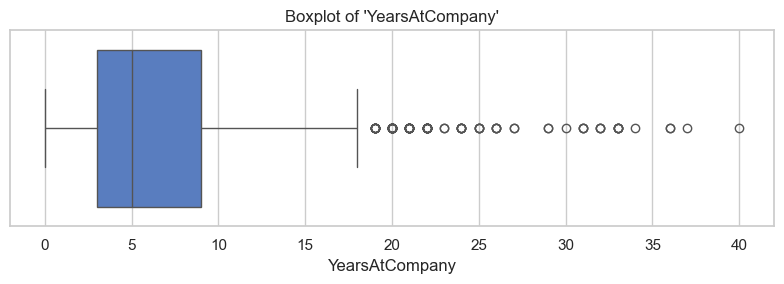

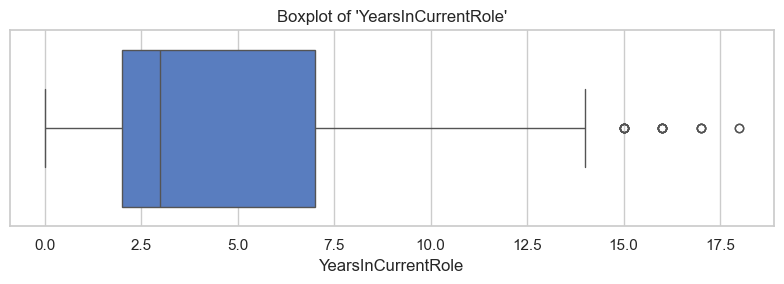

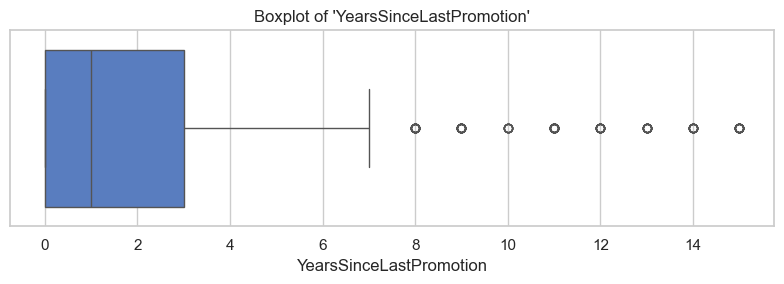

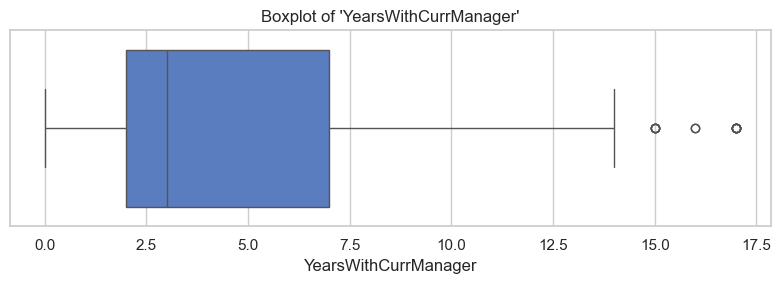

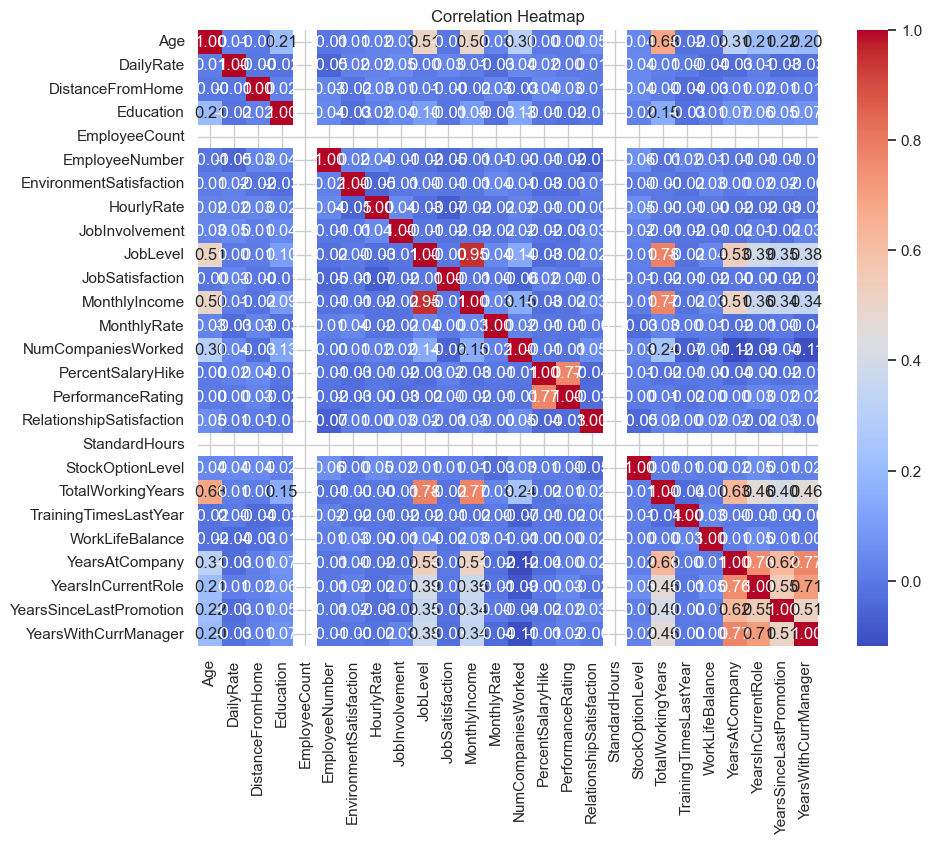

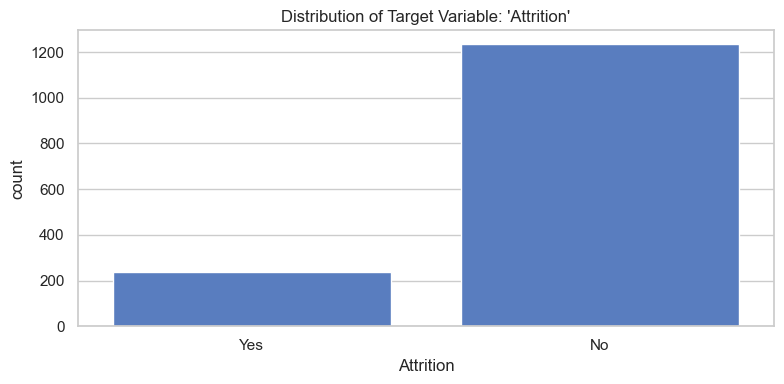

In [6]:
gph=visualize_preprocessing(df, target='Attrition', show_pairplot=False)  # Replace 'target_column_name' with your actual target column name

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [9]:
#train test 


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Convert y to binary
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})


In [11]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def preprocess_data(X_train, X_test=None):
    # Identify categorical and numerical columns
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

    # Decide on encoding strategy: one-hot for few unique, ordinal otherwise
    low_cardinality_cols = [col for col in cat_cols if X_train[col].nunique() <= 10]
    high_cardinality_cols = list(set(cat_cols) - set(low_cardinality_cols))

    # Pipelines
    low_card_cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    high_card_cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
    ])

    num_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('power_transform', PowerTransformer(method='yeo-johnson', standardize=False)),
        ('scaler', StandardScaler())
    ])

    # Combine pipelines
    preprocessor = ColumnTransformer(transformers=[
        ('low_card_cat', low_card_cat_pipeline, low_cardinality_cols),
        ('high_card_cat', high_card_cat_pipeline, high_cardinality_cols),
        ('num', num_pipeline, num_cols)
    ])

    # Fit and transform
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test) if X_test is not None else None

    return X_train_processed, X_test_processed, preprocessor


In [12]:
x_train_processed, x_test_processed, preprocessor = preprocess_data(x_train, x_test)


In [13]:
x_train_processed.shape, x_test_processed.shape

((1176, 55), (294, 55))

In [14]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import pandas as pd

def evaluate_classifiers(X_train, X_test, y_train, y_test):
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(),
        "KNN": KNeighborsClassifier(),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Naive Bayes": GaussianNB()
    }

    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        result = {
            "Model": name,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, zero_division=0),
            "Recall": recall_score(y_test, y_pred, zero_division=0),
            "F1 Score": f1_score(y_test, y_pred, zero_division=0),
            "ROC AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
        }
        results.append(result)

    df_results = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
    return df_results


In [15]:
results_df = evaluate_classifiers(x_train_processed, x_test_processed, y_train, y_test)
print(results_df)


[LightGBM] [Info] Number of positive: 198, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1427
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.168367 -> initscore=-1.597243
[LightGBM] [Info] Start training from score -1.597243
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.901361   0.708333  0.435897  0.539683  0.802614
1          Naive Bayes  0.758503   0.294872  0.589744  0.393162  0.701961
2              XGBoost  0.870748   0.523810  0.282051  0.366667  0.782604
3             LightGBM  0.880952   0.625000  0.256410  0.363636  0.812066
4    Gradient Boosting  0.880952   0.666667  0.205128  0.313725  0.790749
5  

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def tune_logistic_regression(X_train, y_train):
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': [None, 'balanced']
    }

    logreg = LogisticRegression(max_iter=1000)

    grid_search = GridSearchCV(
        logreg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
    )
    grid_search.fit(X_train, y_train)

    print("Best Parameters:")
    print(grid_search.best_params_)
    print("\nBest F1 Score:", grid_search.best_score_)

    return grid_search.best_estimator_


In [17]:
best_logreg = tune_logistic_regression(x_train_processed, y_train)

# Evaluate on test set
y_pred = best_logreg.predict(x_test_processed)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters:
{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

Best F1 Score: 0.5398728016998892
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       255
           1       0.74      0.44      0.55        39

    accuracy                           0.90       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.89      0.90      0.89       294



In [19]:
from sklearn.linear_model import LogisticRegression

# Train the final model with best parameters
final_logreg = LogisticRegression(
    C=1,
    penalty='l1',
    solver='saga',
    class_weight=None,
    max_iter=1000,
    random_state=42
)

final_logreg.fit(x_train_processed, y_train)

# Predict on test set
y_pred_final = final_logreg.predict(x_test_processed)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred_final))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       255
           1       0.74      0.44      0.55        39

    accuracy                           0.90       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.89      0.90      0.89       294

Confusion Matrix:
[[249   6]
 [ 22  17]]


In [1]:
from dataclasses import dataclass
from pathlib import Path

@dataclass
class ModelTrainingConfig:
    root_dir: Path
    train_data_path: Path
    test_data_path: Path
    model_path: Path
    C: float
    penalty: str
    solver: str
    class_weight: str  # use Optional[str] if you plan to set None
    max_iter: int
    random_state: int


In [2]:
from hr_attrition.constants import *
from hr_attrition.utils.common import read_yaml, create_directories

In [ ]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])


    def get_model_trainer_config(self) -> ModelTrainerConfig:
        config = self.config.model_trainer
        params = self.params.ElasticNet
        schema =  self.schema.TARGET_COLUMN

        create_directories([config.root_dir])

        model_trainer_config = ModelTrainerConfig(
            root_dir=config.root_dir,
            train_data_path = config.train_data_path,
            test_data_path = config.test_data_path,
            model_name = config.model_name,
            alpha = params.alpha,
            l1_ratio = params.l1_ratio,
            target_column = schema.name
            
        )

        return model_trainer_config